# 필요 라이브러리

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


# 데이터 불러오기

In [3]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'
cc_21_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_40(raw).csv', encoding="utf-8-sig")
cc_21_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_50(raw).csv', encoding="utf-8-sig")
cc_21_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_60(raw).csv', encoding="utf-8-sig")
cc_22_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_40(raw).csv', encoding="utf-8-sig")
cc_22_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_50(raw).csv', encoding="utf-8-sig")
cc_22_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_60(raw).csv', encoding="utf-8-sig")
cc_23_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_40(raw).csv', encoding="utf-8-sig")
cc_23_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_50(raw).csv', encoding="utf-8-sig")
cc_23_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_60(raw).csv', encoding="utf-8-sig")
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

In [ ]:
cc_21_40_n = pd.read_csv(DATA_PATH_3 + 'cc_21_40_n.csv', encoding="utf-8-sig")
cc_21_50_n = pd.read_csv(DATA_PATH_3 + 'cc_21_50_n.csv', encoding="utf-8-sig")
cc_21_60_n = pd.read_csv(DATA_PATH_3 + 'cc_21_60_n.csv', encoding="utf-8-sig")

cc_22_40_n = pd.read_csv(DATA_PATH_3 + 'cc_22_40_n.csv', encoding="utf-8-sig")
cc_22_50_n = pd.read_csv(DATA_PATH_3 + 'cc_22_50_n.csv', encoding="utf-8-sig")
cc_22_60_n = pd.read_csv(DATA_PATH_3 + 'cc_22_60_n.csv', encoding="utf-8-sig")

cc_23_40_n = pd.read_csv(DATA_PATH_3 + 'cc_23_40_n.csv', encoding="utf-8-sig")
cc_23_50_n = pd.read_csv(DATA_PATH_3 + 'cc_21_50_n.csv', encoding="utf-8-sig")
cc_23_60_n = pd.read_csv(DATA_PATH_3 + 'cc_21_60_n.csv', encoding="utf-8-sig")

In [20]:
cc_22_40['가맹점업종명'].unique()

array(['이동통신요금', '외식', '온라인쇼핑', '의료/보험', '간편결제', '기타', '음식료품', '편의점',
       '대형마트', '카페/베이커리', '백화점', '주유', '스포츠/레저', '여행/교통', '미용', '반려동물',
       '문화생활', '홈쇼핑', '교육/학원'], dtype=object)

In [21]:
customer_22 = pd.read_csv(DATA_PATH_2 + 'customer_22.csv', encoding='euc-kr')

In [22]:
card_22 = pd.read_csv(DATA_PATH + 'card_22.csv', encoding='utf-8-sig')

# 사용자 정의함수

## 시간체크함수

In [23]:
import time

def execution_time(func):
    """
    함수의 실행 시간을 측정하여, 시:분:초 형식으로 출력하는 데코레이터 함수입니다.

    Parameters:
    func (function): 실행 시간을 측정할 함수.

    Returns:
    function: 실행 시간을 측정하고 출력한 후, 원래 함수의 결과를 반환하는 래퍼 함수.

    Example:
    >>> @execution_time
    >>> def example_function():
    >>>     time.sleep(2)

    >>> example_function()
    Execution time for example_function: 0h 0m 2.00s
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper


## 용량 줄이는 함수

### int64 -> int32 , float64 -> float32

In [24]:
import pandas as pd 
import numpy as np

def reduce_mem_usage(df, float16_as32=True):
    """
    데이터프레임의 메모리 사용량을 줄이기 위해 열의 데이터 타입을 최적화하는 함수입니다.
    
    수치형 열에 대해서만 메모리 최적화를 수행하며, 정수형은 int8, int16, int32, int64 등의 가장 작은 가능한 타입으로,
    실수형은 float16, float32, float64로 변환합니다. 기본적으로 float16 대신 float32를 사용할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 메모리 최적화를 적용할 데이터프레임.
    float16_as32 (bool, optional): True일 경우, float16 대신 float32를 사용하여 정밀도를 보장합니다.
                                   기본값은 True입니다.

    Returns:
    pd.DataFrame: 메모리 최적화가 적용된 데이터프레임.

    Example:
    >>> df = pd.DataFrame({'col1': range(100), 'col2': np.random.rand(100)})
    >>> df_optimized = reduce_mem_usage(df)

    출력 예:
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 90.0% 감소했습니다.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('데이터프레임의 초기 메모리 사용량은 {:.2f} MB입니다.'.format(start_mem))

    for col in df.columns:  # 각 열의 이름을 반복합니다.
        col_type = df[col].dtype  # 열의 데이터 타입을 가져옵니다.
        if col_type != object and str(col_type) != 'category':  # 객체 타입이 아닌 수치형 변수만 처리합니다.
            c_min, c_max = df[col].min(), df[col].max()  # 해당 열의 최소값과 최대값을 계산합니다.
            if str(col_type)[:3] == 'int':  # 정수형 변수일 경우 (int8, int16, int32, int64 모두 포함)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 실수형일 경우
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:  # 더 높은 정밀도가 필요하면 float32를 선택할 수 있습니다.
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('최적화 후 데이터프레임의 메모리 사용량은: {:.2f} MB입니다.'.format(end_mem))
    print('메모리 사용량이 {:.1f}% 감소했습니다.'.format(100 * (start_mem - end_mem) / start_mem))

    return df


### 문자열(str, object), int32, float32로 바꾸는 함수

In [25]:
@execution_time
def clean_df(data):
    """
    데이터 전처리를 수행하고, 메모리 사용량을 줄이기 위한 최적화를 수행하는 함수입니다.

    이 함수는 '고객ID' 열을 문자열 형식으로 변환하고, `reduce_mem_usage` 함수를 호출하여
    데이터프레임의 메모리 사용량을 최적화합니다. 또한, 최적화된 데이터프레임의 정보를 출력합니다.

    Parameters:
    data (pd.DataFrame): 전처리와 메모리 최적화를 적용할 데이터프레임.

    Returns:
    pd.DataFrame: 전처리 및 메모리 최적화가 완료된 데이터프레임.

    Decorators:
    @execution_time: 함수의 실행 시간을 측정하고 출력하는 데코레이터.

    Example:
    >>> df = pd.DataFrame({'고객ID': [12345, 67890], 'value': [100, 200]})
    >>> cleaned_df = clean_df(df)

    출력 예:
    Execution time for clean_df: 0h 0m 0.12s
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 50.0% 감소했습니다.
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 2 entries, 0 to 1
    Data columns (total 2 columns):
     #   Column  Non-Null Count  Dtype
    ---  ------  --------------  -----
     0   고객ID   2 non-null      object
     1   value   2 non-null      int8
    dtypes: int8(1), object(1)
    memory usage: 80.0+ bytes
    """
    data['고객ID'] = data['고객ID'].astype(str)
    data = reduce_mem_usage(data)
    print(data.info())
    return data


In [26]:
# 사용 예시
test1 = clean_df(customer_22)

데이터프레임의 초기 메모리 사용량은 2140.22 MB입니다.
최적화 후 데이터프레임의 메모리 사용량은: 1564.01 MB입니다.
메모리 사용량이 26.9% 감소했습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578686 entries, 0 to 21578685
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      object
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int32 
 8   수신_거치식예금  int32 
 9   수신_적립식예금  int32 
 10  수신_펀드     int32 
 11  수신_외화예금   int32 
 12  대출금액      int32 
dtypes: int32(7), object(6)
memory usage: 1.5+ GB
None
Execution time for clean_df: 0h 0m 7.34s


In [27]:
# 사용 예시
test2 = reduce_mem_usage(customer_22)

데이터프레임의 초기 메모리 사용량은 1564.01 MB입니다.
최적화 후 데이터프레임의 메모리 사용량은: 1564.01 MB입니다.
메모리 사용량이 0.0% 감소했습니다.


In [28]:
customer_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578686 entries, 0 to 21578685
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   기준년월      int32 
 1   고객ID      object
 2   연령대       object
 3   성별        object
 4   고객등급      object
 5   자택_시도     object
 6   자택_시군구    object
 7   수신_요구불예금  int32 
 8   수신_거치식예금  int32 
 9   수신_적립식예금  int32 
 10  수신_펀드     int32 
 11  수신_외화예금   int32 
 12  대출금액      int32 
dtypes: int32(7), object(6)
memory usage: 1.5+ GB


## 1차 프로젝트 사용 함수

### 고객연령대별 추출

In [29]:
def customer_generation(df, feature):
    """
    특정 연령대의 데이터를 추출하여 반환하는 함수입니다.

    이 함수는 데이터프레임에서 입력된 특정 연령대에 해당하는 행만을 필터링하여 
    새로운 데이터프레임으로 반환합니다.

    Parameters:
    df (pd.DataFrame): 연령대가 포함된 원본 데이터프레임.
    feature (str): 추출하고자 하는 연령대를 나타내는 문자열. 예: "40대", "50대" 등.

    Returns:
    pd.DataFrame: 입력된 연령대만 포함된 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3],
    ...     '연령대': ['40대', '50대', '40대'],
    ...     '소비금액': [10000, 20000, 15000]
    ... })
    >>> customer_generation(data, '40대')
    40대만 추출한 데이터프레임입니다.
       고객ID  연령대     소비금액
    0      1  40대  10000
    2      3  40대  15000
    """
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df


In [30]:
# 사용 예시
test3 = customer_generation(customer_22, "40대")

40대만 추출한 데이터프레임입니다.
       기준년월        고객ID  연령대 성별  고객등급  자택_시도 자택_시군구  수신_요구불예금  수신_거치식예금  \
712  202212  9997377777  40대  남  일반등급  서울특별시    강북구         0         0   
713  202212  9997372016  40대  남  일반등급  대구광역시     동구   7600000         0   
714  202212  9997367955  40대  여  일반등급   경상북도    영주시    200000         0   
715  202212  9997366851  40대  여  일반등급  대구광역시    수성구    300000         0   
716  202212  9997365476  40대  여  일반등급  대구광역시     중구         0         0   

     수신_적립식예금  수신_펀드  수신_외화예금  대출금액  
712         0      0        0     0  
713         0      0        0     0  
714         0      0        0     0  
715         0      0        0     0  
716         0      0        0     0  


### 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출

In [31]:
def customer_generation_id(df):
    """
    고객 ID의 중복을 제거하여 고유한 고객 ID 리스트를 생성하고 반환하는 함수입니다.

    이 함수는 입력된 데이터프레임에서 '고객ID'와 '연령대' 열만 선택하여,
    '고객ID'의 고유한 값들로 구성된 새로운 데이터프레임을 반환합니다. 
    반환된 데이터프레임은 중복되지 않은 고객 ID만을 포함합니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3],
    ...     '연령대': ['40대', '50대', '40대', '60대']
    ... })
    >>> customer_generation_id(data)
       고객ID
    0     1
    1     2
    2     3
    """
    selected_df = df.loc[:, ['고객ID', '연령대']]
    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    print(df_edit.head())
    return df_edit


In [32]:
# 사용 예시 
test4 = customer_generation_id(test3)

         고객ID
0  9997377777
1  9997372016
2  9997367955
3  9997366851
4  9997365476


### 고객 연령대 나누고, 바로 id를 DataFrame으로 추출
- feature에 연령대 명을 정확히 입력하면, 해댱하는 id를 바로 추출할 수 있다
- 입력안하면 전체 연령대의 고객 ID만 추출한다.

In [33]:
def customer_gen_id(df, feature=None, show_age=False):
    """
    특정 연령대의 고유한 고객 ID를 추출하는 함수입니다.
    
    이 함수는 입력된 데이터프레임에서 특정 연령대(`feature`)에 해당하는 고객들을 필터링하여,
    중복되지 않은 고객 ID를 반환합니다. `show_age` 매개변수를 통해 고객 ID만 반환할지,
    또는 고객 ID와 연령대를 함께 반환할지를 선택할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.
    feature (str, optional): 필터링하고자 하는 연령대 (예: "40대", "50대").
                            None일 경우 모든 연령대가 선택됩니다.
    show_age (bool, optional): True일 경우 고객 ID와 연령대를 포함하여 반환하며,
                               False일 경우 고객 ID만 반환합니다. 기본값은 False입니다.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임. `show_age`가 True일 경우,
                 고객 ID와 연령대를 포함합니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3, 2],
    ...     '연령대': ['40대', '50대', '40대', '60대', '50대']
    ... })
    >>> customer_gen_id(data, feature="50대", show_age=True)
       고객ID  연령대
    0     2  50대
    >>> customer_gen_id(data, feature="40대", show_age=False)
       고객ID
    0     1
    """
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit


In [34]:
test5_1 = customer_gen_id(customer_22, "40대", show_age=False)

         고객ID
0  9997377777
1  9997372016
2  9997367955
3  9997366851
4  9997365476


In [35]:
test5_2 = customer_gen_id(customer_22, "40대", show_age=True)

           고객ID  연령대
712  9997377777  40대
713  9997372016  40대
714  9997367955  40대
715  9997366851  40대
716  9997365476  40대


### 가맹업종명 재분류

In [36]:
def rename_category_store(df):
    """
    가맹점 업종명을 지정된 카테고리로 재분류하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열에 대해 특정 값들을 지정된 카테고리 이름으로
    대체하여 재분류합니다. 이를 통해 다양한 업종명이 지정된 범주의 카테고리로 통합됩니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점업종명' 열이 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['보습학원', '피부미용실', '골프경기장', '주점', '약 국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['교육/학원', '미용', '스포츠/레저', '외식', '의료/보험']
    
    """
    mapping = {
        '교육/학원': ['보습학원', '예·체능계학원', '외국어학원', '기타 교육기관', '기능학원', '학원', '학습지교육', '초중고교육기관'],
        '미용': ['미용원', '피부미용실'],
        '스포츠/레저': ['기타레져업소', '스포츠·레져용품', '스포츠의류', '스크린골프', '헬스클럽', '골프경기장', '종합레져타운', '골프용품 전문점', '골프연습장', '안마/스포츠마사지', '레져업소', '수 영 장'],
        '여행/교통': ['기타숙박업', '철도', '특급호텔', '1급 호텔', '렌터카', '항공사', '콘도', '2급 호텔', '관광여행', '여객선', '고속버스', '택시'],
        '외식': ['일반한식', '주점', '서양음식', '중국식', '일식·회집', '한정식', '칵테일바', '갈비전문점'],
        '대형마트': ['슈퍼마켓', '농협하나로클럽', '농,축협직영매장', '대형할인점'],
        '백화점': ['면 세 점', '자사카드발행백화점'],
        '편의점': ['편 의 점'],
        '음식료품': ['정육점', '스넥', '농·축·수산품', '농축수산가공품', '주류판매점', '홍삼제품', '인삼제품', '기타건강식품'],
        '카페/베이커리': ['기타음료식품', '제과점'],
        '의료/보험': ['약 국', '의 원', '한 의 원', '치과의원', '기타의료기관 및 기타의료기기', '한약방', '한방병원', '생명보험', '건강진단', '기타보험', '병 원(응급실운영)', '치과병원', '동물병원', '종합병원', '손해보험'],
        '주유': ['SK주유소', '쌍용S-OIL', 'GS주유소', '주유소', 'SK가스충전소', '현대정유(오일뱅크)', 'GS가스충전소', '쌍용S-OIL가스충전소', '현대정유가스충전소', 'E1가스충전소', '전기차충전소'],
        '문화생활': ['문화취미기타', '영화관', '티켓'],
        '이동통신요금': ['이동통신요금'],
        '반려동물': ['애완동물'],
        '간편결제': ['인터넷P/G'],
        '기타': ['전자상거래상품권전문판매', '캐주얼의류', 'CATV', '택시회사', '위성방송', '음반영상물', '제 화','주방용구', '연 쇄 점', '액세서리', '전문서적', '주차장', '민예·공예품', '건축용 요업제품', '단란주점', '옷감·직물', '자동차시트·타이어', '독서실', '농기계', '조명기구', '세차장', '사무서비스', '컴퓨터', '가 방', '보일러·펌프·샷시', '카페트,커튼,천막,지물', '자동차부품', '자동차정비', '기타유통업', '이륜차판매', '카인테리어', '화물운송', '내의판매', '목재·석재·철물', '기타 사무용품', '기타가구', '신 발', '비영리/비대상', '기타대인서비스', '기타전기제품', 'DP&E', '주방용식기', '가타자동차서비스', '기타농업관련', '구내매점(국가기관등)', '아동의류', '이용원', '조세서비스', '기념품점', '유흥주점', '통신기기', '화원', '화장품', '기타잡화', '유아원', 'LPG취급점', '페인트', '출판 및 인쇄물', '귀금속', '문구용품', '위탁급식업', '비료,사료,종자', '침구·수예점', '당구장', '가전제품', '인터넷Mall', '가정용품수리', '사무·통신기기수리', '안경', '세탁소', '사우나', '일반서적', '노 래 방', '기계공구',  '완구점', '기타의류', '미곡상', '기타용역서비스', '기타수리서비스', '기타건축자재', '일반가구', '사무용 OA기기', '인테리어전문', '가례서비스업', '시 계', '비영리/대상', '윤활유전문판매', '정수기', '공공요금대행서비스/소득공제비대상', '화방·표구점', '볼 링 장', '인터넷종합Mall', '기타 전문점', '통신판매업1', '종합용역', '전자상거래상품권', '보관및 창고업', '유류판매', '업종미등록', '통신서비스/소득공제비대상', '기타서적문구', '수족관', '공공요금대행서비스/소득공제대상', '상품권전문판매', '혼례서비스업', '냉열기기', '비씨카드 정산용(할인)', '일반(통신판매)', '기타4', '기타1', '부동산중개·임대', 'CATV홈쇼핑', '소프트웨어', '의료용품', '정장', '맞춤복점', '단체복', '상 품 권', 'PG상품권', '비씨카드 정산용가맹점',  '미용재료']
    }
    for category, values in mapping.items():
        df['가맹점업종명'] = df['가맹점업종명'].replace(values, category)
    print(df['가맹점업종명'].unique())
    return df


In [37]:
def rename_category_store_5(df):
    """
    가맹점 업종명을 미리 정의된 카테고리로 분류하여 새로운 '분류' 컬럼에 추가하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열의 값들을 사전 정의된 카테고리로 매핑하여,
    각 가맹점이 해당하는 카테고리 정보를 새로운 '분류' 컬럼에 추가합니다. 이를 통해 다양한 업종을
    지정된 범주의 카테고리로 분류하여 분석할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '분류' 열이 추가된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['백화점', '피부미용실', '골프경기장', '주점', '약국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store_5(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['쇼핑', '기타', '여가', '기타', '식음료']
    
    Categories:
      - 생활비: ['이동통신요금', '의료/보험', '교육/학원', '반려동물', '주유', '미용']
      - 식음료: ['외식', '카페/베이커리', '음식료품']
      - 쇼핑: ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트']
      - 여가: ['스포츠/레저', '여행/교통', '문화생활']
      - 기타: ['기타']
    
    """
    
    mapping = {
       '생활비' : ['이동통신요금', '의료/보험' , '교육/학원', '반려동물', '주유', '미용'],
        '식음료' : ['외식', '카페/베이커리', '음식료품'],
        '쇼핑' : ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트'],
        '여가' : ['스포츠/레저', '여행/교통', '문화생활'],
        '기타' : ['기타']
    }
 
    df['분류'] = df['가맹점업종명']
    for category, values in mapping.items():
        df.loc[df['가맹점업종명'].isin(values), '분류'] = category

    print(df['분류'].unique())
    return df


In [38]:
cc_22_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000


In [39]:
cc_22_40_n = rename_category_store_5(cc_22_40)

['생활비' '식음료' '쇼핑' '기타' '여가']


In [40]:
cc_22_40_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000,생활비
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000,식음료
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000,쇼핑
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000,생활비
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000,식음료


In [41]:
cc_23_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997288918,202312,기타,서울특별시,중구,5번이하,10000
1,9997288918,202312,대형마트,경상북도,경산시,5번이하,30000
2,9997288918,202312,음식료품,경상남도,김해시,5번이하,30000
3,9997288918,202312,편의점,경상북도,김천시,5번이하,30000
4,9997288918,202312,외식,경상북도,김천시,5번이하,20000


In [64]:
cc_23_40_n = rename_category_store_5(cc_23_40)
cc_23_50_n = rename_category_store_5(cc_23_50)
cc_23_60_n = rename_category_store_5(cc_23_60)

['기타' '쇼핑' '식음료' '생활비' '여가']
['식음료' '쇼핑' '생활비' '여가' '기타']
['쇼핑' '식음료' '기타' '생활비' '여가']


In [65]:
cc_23_50_n.to_csv('cc_23_50_n.csv', index=False, encoding='utf-8-sig')
cc_23_60_n.to_csv('cc_23_60_n.csv', index=False, encoding='utf-8-sig')

In [44]:
# 사용 예시
#test6 = rename_category_store(card_22)

### 지역 재분류

In [45]:
def rename_category_region(df):
    """
    가맹점 위치의 광역시도를 지정된 지역권으로 재분류하는 함수입니다.

    이 함수는 데이터프레임의 '가맹점_광역시도' 열에 대해 지역별 분류를 수행하여,
    수도권, 영남권, 충청권, 호남권, 강원·제주권으로 대체합니다.

    Parameters:
    df (pd.DataFrame): '가맹점_광역시도' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점_광역시도' 열이 지역권으로 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점_광역시도': ['서울특별시', '부산광역시', '제주특별자치도', '경기도', '대전광역시'],
    ...     '승인금액': [10000, 20000, 15000, 5000, 3000]
    ... })
    >>> rename_category_region(data)
    '가맹점_광역시도' 열을 다음과 같이 재분류합니다: 수도권, 영남권, 강원·제주권, 충청권 등.
    """
    region_groups = {
        '서울특별시': '수도권', '경기도': '수도권', '인천광역시': '수도권',
        '부산광역시': '영남권', '울산광역시': '영남권', '경상남도': '영남권',
        '충청북도': '충청권', '충청남도': '충청권', '대전광역시': '충청권', '세종특별자치시': '충청권',
        '전북특별자치도': '호남권', '전라남도': '호남권', '광주광역시': '호남권',
        '강원특별자치도': '강원·제주권', '제주특별자치도': '강원·제주권'
    }

    df['가맹점_광역시도'] = df['가맹점_광역시도'].replace(region_groups)
    df['가맹점_광역시도'].value_counts()
    return df


### join (merge)

In [47]:
def join(df1, df2, key, way):
    """
    두 데이터프레임을 지정된 키와 조인 방식에 따라 병합하는 함수입니다.

    이 함수는 `pd.merge`를 사용하여 두 데이터프레임을 특정 열(`key`)을 기준으로 
    주어진 조인 방식(`way`)에 따라 병합합니다. 병합 결과는 데이터프레임 형식으로 반환됩니다.

    Parameters:
    df1 (pd.DataFrame): 첫 번째 데이터프레임.
    df2 (pd.DataFrame): 두 번째 데이터프레임.
    key (str): 조인할 때 사용할 공통 열의 이름.
    way (str): 조인 방식 (예: 'inner', 'left', 'right', 'outer').

    Returns:
    pd.DataFrame: 지정된 키와 방식으로 병합된 데이터프레임.

    Example:
    >>> df1 = pd.DataFrame({'ID': [1, 2, 3], 'Value1': ['A', 'B', 'C']})
    >>> df2 = pd.DataFrame({'ID': [2, 3, 4], 'Value2': ['X', 'Y', 'Z']})
    >>> join(df1, df2, key='ID', way='inner')
    <class 'pandas.core.frame.DataFrame'>
       ID Value1 Value2
    0   2      B      X
    1   3      C      Y
    """
    df_joined = pd.merge(df1, df2, on=f'{key}', how=f'{way}')
    print(type(df_joined))
    print(df_joined.head(3))
    return df_joined


### 연령대와 다른 원하는 컬럼들만 뽑아 dataframe으로 만드는 함수

In [48]:
def slicing(df, generation=None, feature=None):  
    """
    특정 연령대와 선택한 컬럼들로 필터링된 데이터프레임을 반환하는 함수입니다.

    이 함수는 지정된 연령대(`generation`)와 특정 컬럼들(`feature`)을 기반으로 데이터프레임을 필터링합니다. 
    `generation`과 `feature`가 단일 값일 경우, 리스트로 변환하여 다중 값으로 처리할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 필터링할 데이터프레임.
    generation (str or list of str, optional): 필터링할 연령대(예: "40대"). 하나 이상의 연령대를 리스트로 전달할 수 있습니다.
    feature (str or list of str, optional): 필터링할 컬럼명(예: '고객ID'). 하나 이상의 컬럼명을 리스트로 전달할 수 있습니다.

    Returns:
    pd.DataFrame: 지정된 연령대와 선택한 컬럼들만 포함하는 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3, 4],
    ...     '연령대': ['40대', '50대', '40대', '60대'],
    ...     '지출액': [10000, 20000, 15000, 5000]
    ... })
    >>> slicing(data, generation="40대", feature="고객ID")
    <class 'pandas.core.frame.DataFrame'>
       고객ID   연령대
    0      1  40대
    2      3  40대
    """
    # generation과 feature가 단일 값일 경우 리스트로 변환
    if isinstance(generation, str):  
        generation = [generation]
    if isinstance(feature, str):  
        feature = [feature]
        
    df_filtered = df[df['연령대'].isin(generation)]
    sliced_df = df_filtered.loc[:, feature + ['연령대']]  # feature 리스트와 '연령대' 추가

    print(type(sliced_df))
    print(sliced_df.head())
    return sliced_df


### 세대 - 가맹업종별 승인금액 bar plot

In [49]:
def amount_generation(df, year, generation=None, top=None, bottom=None, columns=None):
    """
    연도와 세대별로 업종별 승인금액 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 업종별 승인금액 합계를 계산하여 바 차트로 시각화합니다. 
    특정 상위 또는 하위 업종을 선택하거나, 특정 업종 목록에 따라 필터링할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명'과 '승인금액' 열이 포함된 데이터프레임.
    year (int): 시각화할 연도.
    generation (str, optional): 특정 세대를 나타내는 문자열로, 제목에 포함됩니다. 기본값은 None입니다.
    top (int, optional): 승인금액 합계 상위 몇 개의 업종을 표시할지 결정합니다. 기본값은 None입니다.
    bottom (int, optional): 승인금액 합계 하위 몇 개의 업종을 표시할지 결정합니다. `top`과 함께 사용할 수 없습니다. 기본값은 None입니다.
    columns (list of str, optional): 필터링할 업종명 리스트. 이 값이 주어지면 해당 업종들만 시각화에 포함됩니다. 기본값은 None입니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['업종1', '업종2', '업종3', '업종4', '업종5'],
    ...     '승인금액': [100000000, 200000000, 150000000, 50000000, 30000000]
    ... })
    >>> amount_generation(data, year=2023, generation="40대", top=3)
    
    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 출력됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by='승인금액', ascending=False)
    if top is not None:
        total_amounts_sort = total_amounts_sort.head(top)
    elif bottom is not None:
        total_amounts_sort = total_amounts_sort.tail(bottom)
    if columns is not None:
        total_amounts_sort = total_amounts_sort[total_amounts_sort['가맹점업종명'].isin(columns)]
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e7:.2f}억',  # 억 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 억 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
plt.show()

### count barplot

In [50]:
def barplot_counts(df, feature, year, generation):
    """
    지정된 컬럼의 카드 거래량을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 지정된 `feature` 컬럼의 값들을 세어 카드 거래량을 계산하고, 
    이를 백만 건 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature (str): 거래량을 계산할 컬럼명.
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ... })
    >>> barplot_counts(data, feature='업종명', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 카드 거래량에 대한 바 차트가 백만 건 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    card_counts = df[feature].value_counts()
    ax = sns.barplot(x=card_counts.index, y=card_counts.values / 1e6, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 카드거래량")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("거래량 (백만건)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.text(1, 1.02, "(단위: 백만건)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,    # x 위치 (막대 중앙)
            p.get_height() + 0.1,             # y 위치를 더 높게 조정 (막대 위 약간 위로)
            f'{p.get_height():.2f}백만건',    # 백만 단위로 변환된 값 표시
            ha='center',                      # 텍스트 가로 정렬 (중앙 정렬)
            fontsize=8                       # 폰트 크기를 10으로 조정
        )

    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()


### 합계 barplot

In [51]:
def barplot_sum(df, feature1, feature2, year, generation):
    """
    지정된 컬럼을 기준으로 다른 컬럼의 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 계산하고,
    이를 조 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계를 계산할 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [1000000000000, 2000000000000, 1500000000000, 500000000000, 300000000000]
    ... })
    >>> barplot_sum(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 조 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


### 평균 승인 금액표 함수

In [53]:
def table_avg(df, feature1, feature2):
    """
    특정 컬럼을 기준으로 다른 컬럼의 총합과 평균을 계산하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 구하고, 
    해당 기준의 거래 건수를 기반으로 평균 승인금액을 계산하여 반환합니다.

    Parameters:
    df (pd.DataFrame): 집계를 수행할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계 및 평균을 계산할 대상 컬럼명 (예: 승인금액).

    Returns:
    pd.DataFrame: 그룹화된 `feature1` 컬럼별로 `feature2` 합계, 거래량(카드거래량), 평균 승인금액이 포함된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> table_avg(data, feature1='업종명', feature2='승인금액')
       업종명      승인금액  카드거래량   평균 승인금액
    0   외식  330000.0   3.0  110000
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    return

### 평균 승인금액 그래프 함수

In [55]:
def barplot_avg(df, feature1, feature2, year, generation):
    """
    특정 컬럼을 기준으로 다른 컬럼의 평균값을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 평균 승인금액을 계산하고, 
    이를 막대 그래프로 시각화합니다. 평균 승인금액은 만 단위로 표시됩니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 평균을 계산할 대상 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> barplot_avg(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 평균 승인금액에 대한 바 차트가 만 단위로 표시됩니다.
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    amounts_sort = amounts.sort_values(by='평균 승인금액', ascending=False)
    amounts_sort['평균 승인금액_만단위'] = amounts_sort['평균 승인금액']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=f'{feature1}', y='평균 승인금액', data=amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 평균{feature2}")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel("평균 승인금액 (단위: 만 원)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ticks = ax.get_yticks()  # 현재 Y축 눈금 가져오기
    ax.set_yticklabels([int(tick / 10000) for tick in ticks])  # 만 단위로 변환하여 설정
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 10000:.2f}만원',  # 만 단위로 표시
                ha='center',                    # 텍스트 가운데 정렬
                fontsize=6
            )
    
        ax.text(1, 1.02, "(단위: 만 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
        
        plt.show()

# 분산분석
## 연령대간 승인금액 차이 one-way 분산분석 - 대분류

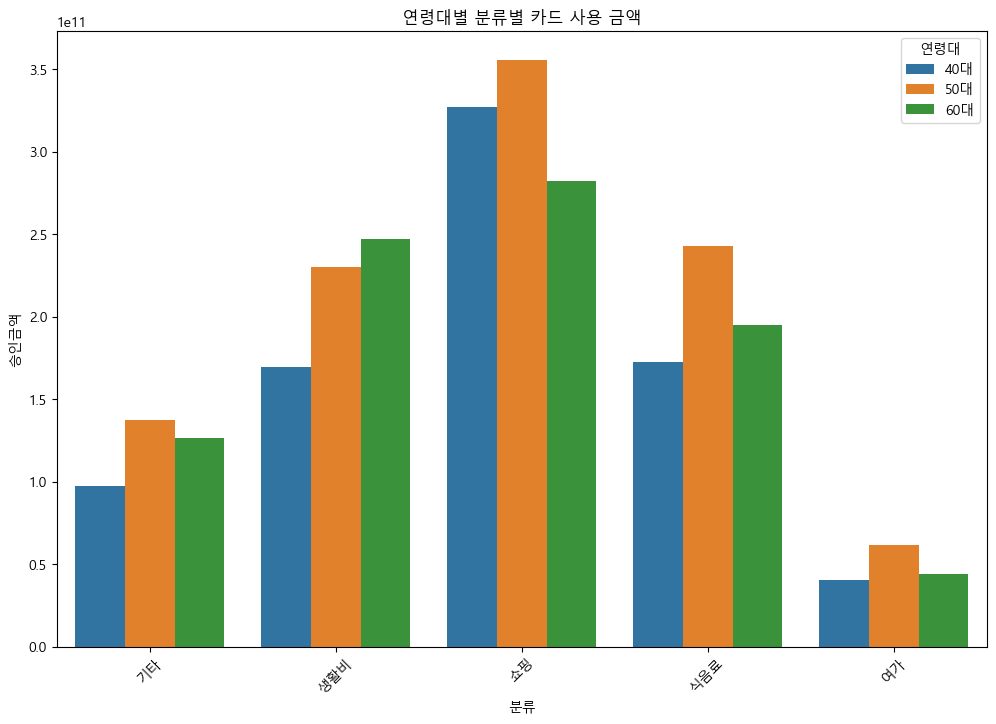

F-statistic: 0.22238506802515637, p-value: 0.8038336832335384
연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.


In [66]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 각 데이터에 연령대 정보 추가
cc_23_40_n['연령대'] = '40대'
cc_23_50_n['연령대'] = '50대'
cc_23_60_n['연령대'] = '60대'
combined_data = pd.concat([cc_23_40_n[['분류', '승인금액', '연령대']],
                            cc_23_50_n[['분류', '승인금액', '연령대']],
                            cc_23_60_n[['분류', '승인금액', '연령대']]])
# 가맹점업종별 승인금액 합계
age_group_summary = combined_data.groupby(['연령대', '분류'])['승인금액'].sum().reset_index()
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=age_group_summary, x='분류', y='승인금액', hue='연령대')
plt.title('연령대별 분류별 카드 사용 금액')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.show()
# 총 승인금액 차이 분석을 위한 피벗 테이블 생성
pivot_table = age_group_summary.pivot(index='분류', columns='연령대', values='승인금액').fillna(0)
# ANOVA 분석
f_statistic, p_value = stats.f_oneway(pivot_table['40대'], pivot_table['50대'], pivot_table['60대'])
# 결과 출력
print(f'F-statistic: {f_statistic}, p-value: {p_value}')
# 결과 해석
if p_value < 0.05:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
else:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analyze_credit_card_usage_by_age(cc_23_40_n, cc_23_50_n, cc_23_60_n):
    """
    연령대별 카드 사용 금액을 분석하고 시각화 및 ANOVA 테스트를 수행하는 함수입니다.

    이 함수는 각 연령대(40대, 50대, 60대)의 데이터프레임을 받아서,
    '승인금액'을 연령대 및 가맹점 업종 분류에 따라 집계합니다.
    그 후, 연령대별 승인금액 차이를 시각화하고, ANOVA 분석을 통해
    연령대 간의 카드 사용 금액 차이가 통계적으로 유의미한지 여부를 평가합니다.

    Parameters:
    - cc_23_40_n (pd.DataFrame): 40대 사용자의 카드 사용 데이터프레임, '분류'와 '승인금액' 열을 포함해야 함.
    - cc_23_50_n (pd.DataFrame): 50대 사용자의 카드 사용 데이터프레임, '분류'와 '승인금액' 열을 포함해야 함.
    - cc_23_60_n (pd.DataFrame): 60대 사용자의 카드 사용 데이터프레임, '분류'와 '승인금액' 열을 포함해야 함.

    Returns:
    None

    Process:
    1. 각 연령대 데이터에 '연령대' 열을 추가하여 연령대를 지정하고, 세 데이터프레임을 결합합니다.
    2. 연령대와 가맹점 업종 분류별로 승인금액의 합계를 구합니다.
    3. 연령대별 분류별 카드 사용 금액을 막대 그래프로 시각화합니다.
    4. 피벗 테이블을 생성하여 ANOVA 분석에 필요한 형식으로 데이터를 정리합니다.
    5. ANOVA 테스트를 수행하여 연령대 간 승인금액 차이의 통계적 유의성을 평가합니다.

    Example:
    >>> analyze_credit_card_usage_by_age(cc_23_40_n, cc_23_50_n, cc_23_60_n)

    Outputs:
    - 연령대별 분류별 카드 사용 금액 막대 그래프
    - ANOVA 분석 결과 (F-statistic, p-value)
    - 결과 해석 출력 ("연령대 간의 승인금액 차이가 통계적으로 유의미합니다." 또는 "연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")
    """
    
    # 각 데이터에 연령대 정보 추가
    cc_23_40_n['연령대'] = '40대'
    cc_23_50_n['연령대'] = '50대'
    cc_23_60_n['연령대'] = '60대'
    combined_data = pd.concat([cc_23_40_n[['분류', '승인금액', '연령대']],
                                cc_23_50_n[['분류', '승인금액', '연령대']],
                                cc_23_60_n[['분류', '승인금액', '연령대']]])
    
    # 가맹점업종별 승인금액 합계
    age_group_summary = combined_data.groupby(['연령대', '분류'])['승인금액'].sum().reset_index()
    
    # 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(data=age_group_summary, x='분류', y='승인금액', hue='연령대')
    plt.title('연령대별 분류별 카드 사용 금액')
    plt.xticks(rotation=45)
    plt.legend(title='연령대')
    plt.show()
    
    # 총 승인금액 차이 분석을 위한 피벗 테이블 생성
    pivot_table = age_group_summary.pivot(index='분류', columns='연령대', values='승인금액').fillna(0)
    
    # ANOVA 분석
    f_statistic, p_value = stats.f_oneway(pivot_table['40대'], pivot_table['50대'], pivot_table['60대'])
    
    # 결과 출력
    print(f'F-statistic: {f_statistic}, p-value: {p_value}')
    
    # 결과 해석
    if p_value < 0.05:
        print("연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
    else:
        print("연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")


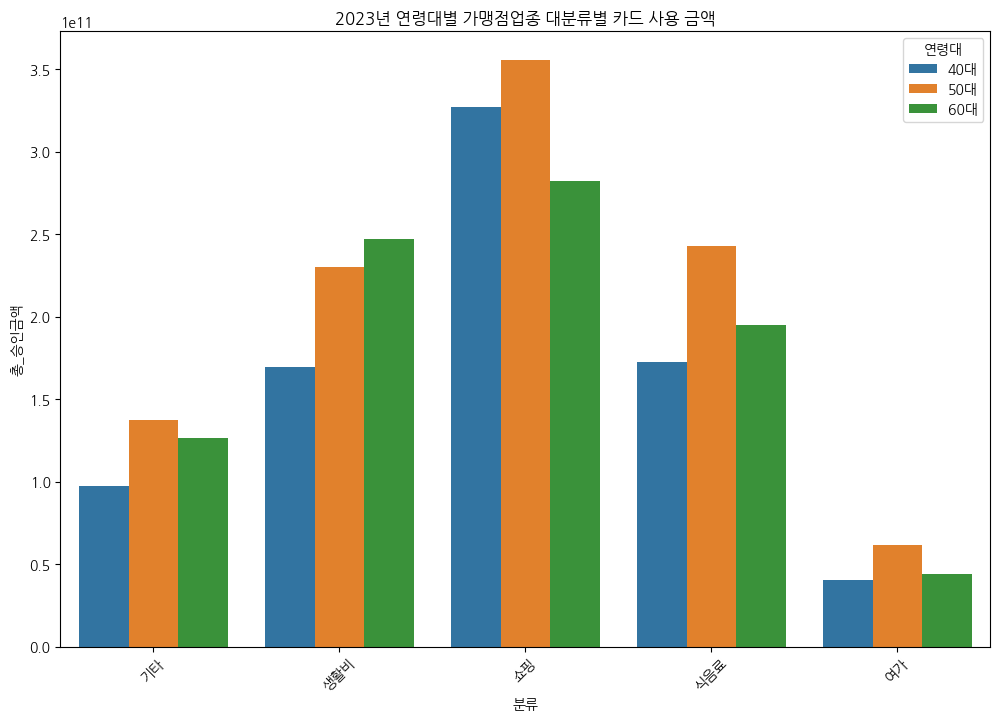

기타의 F-statistic: nan, p-value: nan
기타: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
생활비의 F-statistic: nan, p-value: nan
생활비: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
쇼핑의 F-statistic: nan, p-value: nan
쇼핑: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
식음료의 F-statistic: nan, p-value: nan
식음료: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
여가의 F-statistic: nan, p-value: nan
여가: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.


In [119]:
# 각 데이터에 연령대 정보 추가
cc_23_40_n['연령대'] = '40대'
cc_23_50_n['연령대'] = '50대'
cc_23_60_n['연령대'] = '60대'

# 가맹점업종별 승인금액 및 카드 사용 건수 집계
age_group_summary = combined_data.groupby(['연령대', '분류']).agg(
    총_승인금액=('승인금액', 'sum'),
    카드_사용_건수=('승인금액', 'count')
).reset_index()

# 각 가맹점업종별 승인금액 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=age_group_summary, x='분류', y='총_승인금액', hue='연령대')
plt.title('2023년 연령대별 가맹점업종 대분류별 카드 사용 금액')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.show()

# ANOVA 분석
# 각 가맹점업종에 대해 연령대 간의 총 승인금액 차이를 분석
for 업종 in age_group_summary['분류'].unique():
    subset = age_group_summary[age_group_summary['분류'] == 업종]
    if subset.shape[0] == 3:  # 연령대가 모두 있을 경우에만 ANOVA 수행
        f_statistic, p_value = stats.f_oneway(
            subset[subset['연령대'] == '40대']['총_승인금액'],
            subset[subset['연령대'] == '50대']['총_승인금액'],
            subset[subset['연령대'] == '60대']['총_승인금액']
        )
        print(f'{업종}의 F-statistic: {f_statistic}, p-value: {p_value}')

        # 결과 해석
        if p_value < 0.05:
            print(f"{업종}: 연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
        else:
            print(f"{업종}: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")

# 인당 승인금액 분산분석 - 대분류, 세대별

In [ ]:
# 가맹점_광역시도 컬럼 제거하여 새로운 데이터프레임 생성
cc_23_40_mod = cc_21_40.drop(columns=['거래년월', '가맹점_광역시도', '가맹점_시군구', '승인건수'])

# 결과 출력 (새로운 데이터프레임의 첫 몇 줄을 확인)
print(cc_21_40_mod.head(15))

In [ ]:
# 가맹점_광역시도 컬럼 제거하여 새로운 데이터프레임 생성
cc_21_50_mod = cc_21_50.drop(columns=['거래년월', '가맹점_광역시도', '가맹점_시군구', '승인건수'])

# 결과 출력 (새로운 데이터프레임의 첫 몇 줄을 확인)
print(cc_21_50_mod.head(15))

In [ ]:
# 가맹점_광역시도 컬럼 제거하여 새로운 데이터프레임 생성
cc_21_60_mod = cc_21_60.drop(columns=['거래년월', '가맹점_광역시도', '가맹점_시군구', '승인건수'])

# 결과 출력 (새로운 데이터프레임의 첫 몇 줄을 확인)
print(cc_21_60_mod.head(15))

In [71]:
cc_23_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9997288918,202312,기타,서울특별시,중구,5번이하,10000,기타,40대
1,9997288918,202312,대형마트,경상북도,경산시,5번이하,30000,쇼핑,40대
2,9997288918,202312,음식료품,경상남도,김해시,5번이하,30000,식음료,40대
3,9997288918,202312,편의점,경상북도,김천시,5번이하,30000,쇼핑,40대
4,9997288918,202312,외식,경상북도,김천시,5번이하,20000,식음료,40대


In [72]:
cc_23_40_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9997288918,202312,기타,서울특별시,중구,5번이하,10000,기타,40대
1,9997288918,202312,대형마트,경상북도,경산시,5번이하,30000,쇼핑,40대
2,9997288918,202312,음식료품,경상남도,김해시,5번이하,30000,식음료,40대
3,9997288918,202312,편의점,경상북도,김천시,5번이하,30000,쇼핑,40대
4,9997288918,202312,외식,경상북도,김천시,5번이하,20000,식음료,40대


In [86]:
cc_23_40_n.loc
cc_23_40_n_mod= cc_23_40_n.loc[:, ['고객ID', '가맹점업종명', '분류', '승인금액']]

In [94]:
cc_23_50_n_mod= cc_23_50_n.loc[:, ['고객ID', '가맹점업종명', '분류', '승인금액']]
cc_23_60_n_mod= cc_23_60_n.loc[:, ['고객ID', '가맹점업종명', '분류', '승인금액']]

In [88]:
cc_23_40_n_mod.head()

,고객ID,가맹점업종명,분류,승인금액
0,9997288918,기타,기타,10000
1,9997288918,대형마트,쇼핑,30000
2,9997288918,음식료품,식음료,30000
3,9997288918,편의점,쇼핑,30000
4,9997288918,외식,식음료,20000


## 대분류

In [112]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
ID_업종별합산_40 = cc_23_40_n_mod.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_40 = ID_업종별합산_40.groupby('분류')['승인금액'].mean().reset_index()
# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format
# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_40 = 업종별_승인금액_평균_40.sort_values(by='승인금액', ascending=False)
# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_40

,분류,승인금액
2,쇼핑,"2,605,783"
1,생활비,"1,572,210"
3,식음료,"1,456,395"
0,기타,"895,545"
4,여가,"477,684"


In [113]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
ID_업종별합산_50 = cc_23_50_n_mod.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_50 = ID_업종별합산_50.groupby('분류')['승인금액'].mean().reset_index()
# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format
# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_50 = 업종별_승인금액_평균_50.sort_values(by='승인금액', ascending=False)
# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_50

,분류,승인금액
2,쇼핑,"2,276,403"
1,생활비,"1,645,116"
3,식음료,"1,599,004"
0,기타,"968,309"
4,여가,"571,123"


In [114]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
ID_업종별합산_60 = cc_23_60_n_mod.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_60 = ID_업종별합산_60.groupby('분류')['승인금액'].mean().reset_index()
# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format
# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_60 = 업종별_승인금액_평균_60.sort_values(by='승인금액', ascending=False)
# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_60

,분류,승인금액
2,쇼핑,"1,656,662"
1,생활비,"1,526,409"
3,식음료,"1,186,671"
0,기타,"793,163"
4,여가,"428,112"


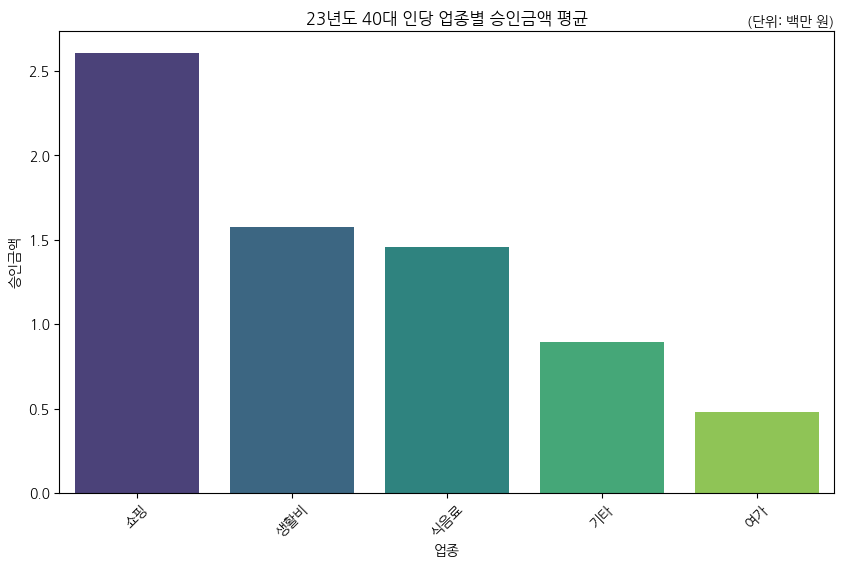

In [116]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# 그래프 설정
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))

업종별_승인금액_평균_40['승인금액_단위백'] = 업종별_승인금액_평균_40['승인금액'] / 1e6

sns.barplot(x='분류', y='승인금액_단위백', data=업종별_승인금액_평균_40, palette="viridis")

# 제목 및 축 레이블 설정
plt.title('23년도 40대 인당 업종별 승인금액 평균')
plt.xlabel('업종')
plt.ylabel('승인금액')
plt.text(1, 1.02, "(단위: 백만 원)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

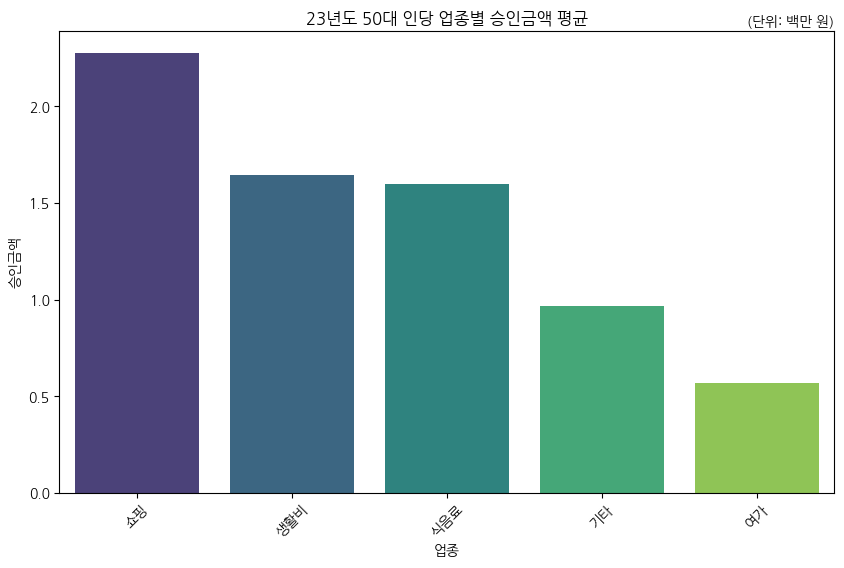

In [117]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# 그래프 설정
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))

업종별_승인금액_평균_50['승인금액_단위백'] = 업종별_승인금액_평균_50['승인금액'] / 1e6

sns.barplot(x='분류', y='승인금액_단위백', data=업종별_승인금액_평균_50, palette="viridis")

# 제목 및 축 레이블 설정
plt.title('23년도 50대 인당 업종별 승인금액 평균')
plt.xlabel('업종')
plt.ylabel('승인금액')
plt.text(1, 1.02, "(단위: 백만 원)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

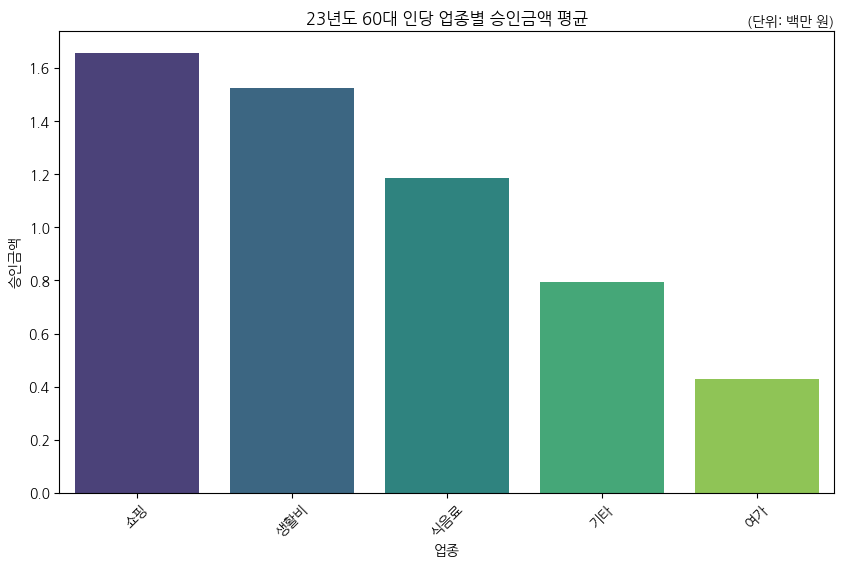

In [118]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# 그래프 설정
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))

업종별_승인금액_평균_60['승인금액_단위백'] = 업종별_승인금액_평균_60['승인금액'] / 1e6

sns.barplot(x='분류', y='승인금액_단위백', data=업종별_승인금액_평균_60, palette="viridis")

# 제목 및 축 레이블 설정
plt.title('23년도 60대 인당 업종별 승인금액 평균')
plt.xlabel('업종')
plt.ylabel('승인금액')
plt.text(1, 1.02, "(단위: 백만 원)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 각 데이터에 연령대 정보 추가
cc_23_40_n['연령대'] = '40대'
cc_23_50_n['연령대'] = '50대'
cc_23_60_n['연령대'] = '60대'
combined_data = pd.concat([cc_23_40_n[['분류', '승인금액', '연령대']],
                            cc_23_50_n[['분류', '승인금액', '연령대']],
                            cc_23_60_n[['분류', '승인금액', '연령대']]])
# 가맹점업종별 승인금액 합계
age_group_summary = combined_data.groupby(['연령대', '분류'])['승인금액'].sum().reset_index()
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=age_group_summary, x='분류', y='승인금액', hue='연령대')
plt.title('연령대별 분류별 카드 사용 금액')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.show()
# 총 승인금액 차이 분석을 위한 피벗 테이블 생성
pivot_table = age_group_summary.pivot(index='분류', columns='연령대', values='승인금액').fillna(0)
# ANOVA 분석
f_statistic, p_value = stats.f_oneway(pivot_table['40대'], pivot_table['50대'], pivot_table['60대'])
# 결과 출력
print(f'F-statistic: {f_statistic}, p-value: {p_value}')
# 결과 해석
if p_value < 0.05:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
else:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")

## 가맹업종별 (중분류)

In [111]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
ID_업종별합산_40_가맹 = cc_23_40_n_mod.groupby(['고객ID', '가맹점업종명'])['승인금액'].sum().reset_index()
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_40_가맹 = ID_업종별합산_40_가맹.groupby('가맹점업종명')['승인금액'].mean().reset_index()
# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format
# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_40_가맹 = 업종별_승인금액_평균_40_가맹.sort_values(by='승인금액', ascending=False)
# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_40_가맹

,가맹점업종명,승인금액
0,간편결제,"1,598,759"
1,교육/학원,"1,576,579"
11,외식,"1,127,479"
10,온라인쇼핑,"941,928"
2,기타,"895,545"
13,의료/보험,"851,690"
3,대형마트,"844,268"
14,이동통신요금,"840,527"
15,주유,"698,631"
7,백화점,"524,880"


In [105]:
# 대분류로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_40 = ID_업종별합산_40.groupby('분류')['승인금액'].mean().reset_index()
업종별_승인금액_평균_40

,분류,승인금액
0,기타,8.955454e+05
1,생활비,1.572210e+06
2,쇼핑,2.605783e+06
3,식음료,1.456395e+06
4,여가,4.776836e+05


In [108]:
# 대분류로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_50 = ID_업종별합산_50.groupby('분류')['승인금액'].mean().reset_index()
업종별_승인금액_평균_50

,분류,승인금액
0,기타,9.683089e+05
1,생활비,1.645116e+06
2,쇼핑,2.276403e+06
3,식음료,1.599004e+06
4,여가,5.711225e+05


In [109]:
# 대분류로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_60 = ID_업종별합산_60.groupby('분류')['승인금액'].mean().reset_index()
업종별_승인금액_평균_60

,분류,승인금액
0,기타,7.931631e+05
1,생활비,1.526409e+06
2,쇼핑,1.656662e+06
3,식음료,1.186671e+06
4,여가,4.281121e+05


In [ ]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_50 = ID_업종별합산_50.groupby('가맹점업종명')['승인금액'].mean().reset_index()

# 과학적 표기법 활성화 (기본 설정으로 되돌리기)
#pd.options.display.float_format = None

# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format

# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_50 = 업종별_승인금액_평균_50.sort_values(by='승인금액', ascending=False)

# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_50

In [ ]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_50 = ID_업종별합산_50.groupby('가맹점업종명')['승인금액'].mean().reset_index()

# 과학적 표기법 활성화 (기본 설정으로 되돌리기)
#pd.options.display.float_format = None

# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format

# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_50 = 업종별_승인금액_평균_50.sort_values(by='승인금액', ascending=False)

# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_50

In [ ]:
# 가맹점업종명으로 그룹화하여 승인금액 평균 계산
업종별_승인금액_평균_60 = ID_업종별합산_60.groupby('가맹점업종명')['승인금액'].mean().reset_index()

# 과학적 표기법 활성화 (기본 설정으로 되돌리기)
#pd.options.display.float_format = None

# 과학적 표기법 해제
pd.options.display.float_format = '{:,.0f}'.format

# 승인금액을 기준으로 내림차순 정렬
업종별_승인금액_평균_60 = 업종별_승인금액_평균_60.sort_values(by='승인금액', ascending=False)

# 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
업종별_승인금액_평균_60

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# 그래프 설정
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))

업종별_승인금액_평균_40['승인금액_단위백'] = 업종별_승인금액_평균_40['승인금액'] / 1e6

sns.barplot(x='가맹점업종명', y='승인금액_단위백', data=업종별_승인금액_평균_40, palette="viridis")

# 제목 및 축 레이블 설정
plt.title('21년도 40대 인당 업종별 승인금액 평균')
plt.xlabel('업종')
plt.ylabel('승인금액')
plt.text(1, 1.02, "(단위: 백만 원)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

# 층화추출

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터프레임 예시
data = pd.DataFrame({
    '고객ID': range(1, 101),
    '연령대': ['20대', '30대', '40대', '50대'] * 25,  # 예시 데이터
    '거래량': np.random.randint(1000, 5000, size=100)  # 예시 데이터
})
# 층화추출 수행
train, test = train_test_split(data, test_size=0.3, stratify=data['연령대'], random_state=42)
# 결과 확인
print("훈련 데이터의 연령대 분포:\n", train['연령대'].value_counts())
print("테스트 데이터의 연령대 분포:\n", test['연령대'].value_counts())
5:27
# 각 연령대별로 20%의 데이터를 추출하는 예시
sampled_data = data.groupby('연령대', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
# 결과 확인
print(sampled_data['연령대'].value_counts())

SyntaxError: illegal target for annotation (1912771450.py, line 14)

In [ ]:
column 삭제
df_40 = cc_21_40_n.drop(columns=['거래년월', '가맹점_광역시도', '가맹점_시군구', '승인건수', '가맹점업종명', '고객ID'])
층화추출
# '분류' 항목별 데이터 개수 확인
counts = df_40['분류'].value_counts()
total_count = len(df_40)
# 각 분류별 비율 계산
sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
# '분류'별로 비율대로 표본 추출
sample_df_40 = df_40.groupby('분류', group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
)
print("40대 분류별 비율에 따른 층화 추출 결과:")
sample_df_40
분류 갯수 확인
sample_df_40['분류'].value_counts()

In [ ]:
그룹화
# 고객 ID와 분류로 그룹화하여 승인금액 합산
df_40 = cc_21_40_n.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 결과 출력 (합산된 데이터프레임의 첫 몇 줄을 확인)
print(df_40)
column 삭제
df_40 = df_40.drop(columns=['고객ID'])
층화추출 후 분류별 연간 승인금액 평균
# '분류' 항목별 데이터 개수 확인
counts = df_40['분류'].value_counts()
total_count = len(df_40)
# 각 분류별 비율 계산
sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
# '분류'별로 비율대로 표본 추출
sample_df_40 = df_40.groupby('분류', group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
)
# 샘플 데이터 보고 싶으면
# print("40대 분류별 비율에 따른 층화 추출 결과:")
# sample_df_40
# 분류별 승인금액 평균 계산
aver_sample_40 = sample_df_40.groupby('분류')['승인금액'].mean()
pd.options.display.float_format = '{:,.0f}'.format
print("분류별 연간 승인금액 평균:")
aver_sample_40